# Data Visualization for UCI Breast Cancer Wisconsin Diagnostic Dataset

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [63]:
from ucimlrepo import fetch_ucirepo
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets

df = pd.concat([X,y], axis=1)

# metadata
# print(breast_cancer_wisconsin_diagnostic.metadata)
# Diagnosis (M = malignant, B = benign)
  
# variable information 
# print(breast_cancer_wisconsin_diagnostic.variables) 

## Description of the Dataset

The UCI Breast Cancer Wisconsin Diagnostic dataset consists of data from 569 instances of images of breast mass cells. Each row in the data set summarizes characteristics of cell nuclei from a single breast mass sample for a single patient. The properties analyzed are:
- Radius
- Texture
- Perimeter
- Area
- Smoothness
- Compactness
- Concavity
- Concave Points
- Symmetry
- Fractal Dimension

For each feature the data set records the mean, variation and worst value. These statistics are associated with the numerical values 1 2 and 3 respectively in the column labels. The dataset consists of 357 benign samples and 212 malignant samples.

In [50]:
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [64]:
benign_df = df[df['Diagnosis'] == 'B']
malignant_df = df[df['Diagnosis'] == 'M']

## Histogram Plots Comparing Mean Feature Values Between Diagnoses

<function matplotlib.pyplot.show(close=None, block=None)>

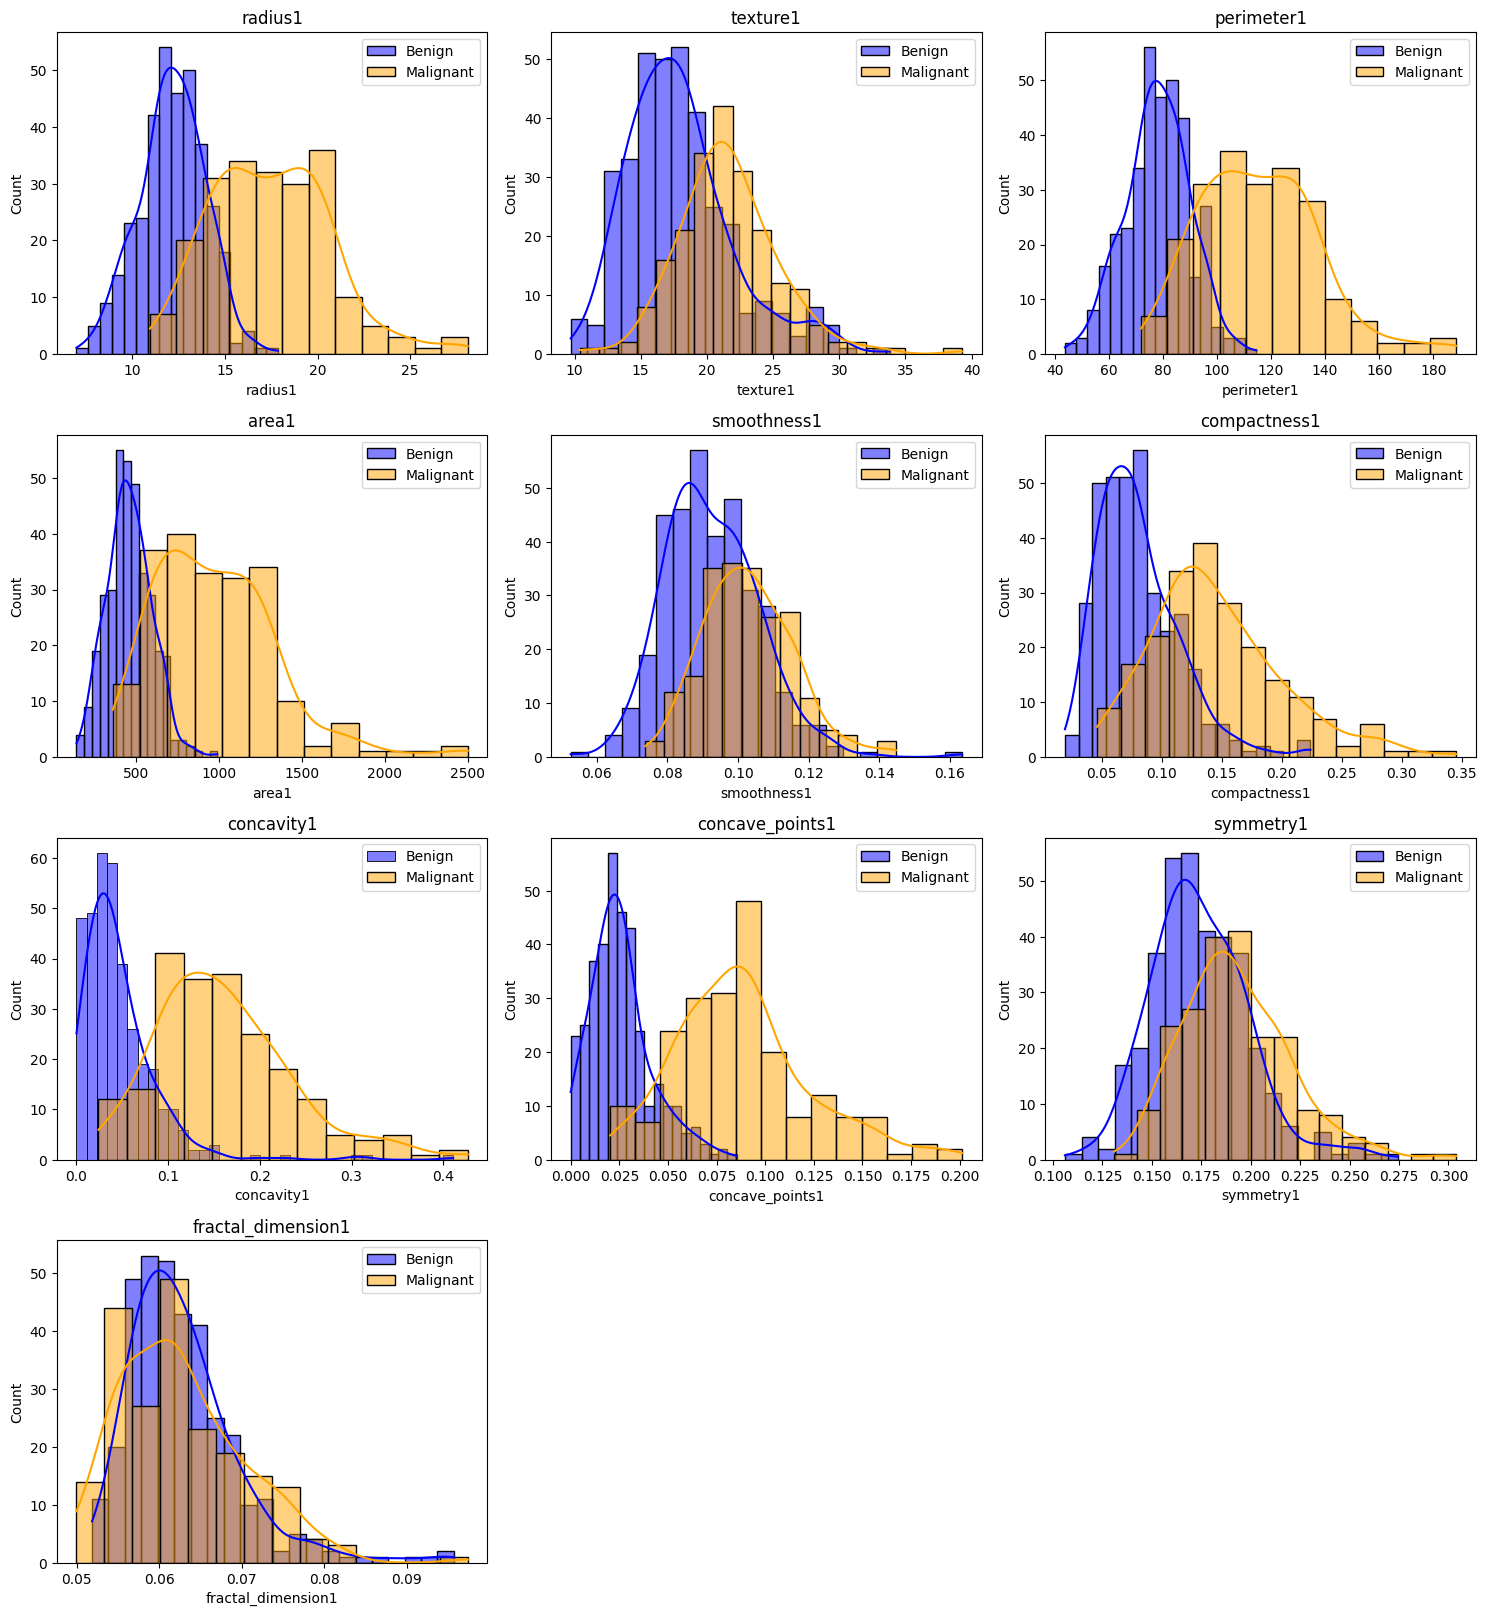

In [71]:
cols = df.columns[:-1]
n_plots = len(cols)

n_rows = math.ceil(n_plots/3)
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
axes = axes.flatten()

for index, col in enumerate(cols[:10]):
    ax = axes[index]
    sns.histplot(data=benign_df[col], color='blue', label='Benign', kde=True, ax=ax)
    sns.histplot(data=malignant_df[col], color='orange', label='Malignant', kde=True, ax=ax)
    ax.set_title(col)
    ax.legend()

for j in range(index+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show

## Histogram Plots Comparing Worst Feature Values Between Diagnoses

<function matplotlib.pyplot.show(close=None, block=None)>

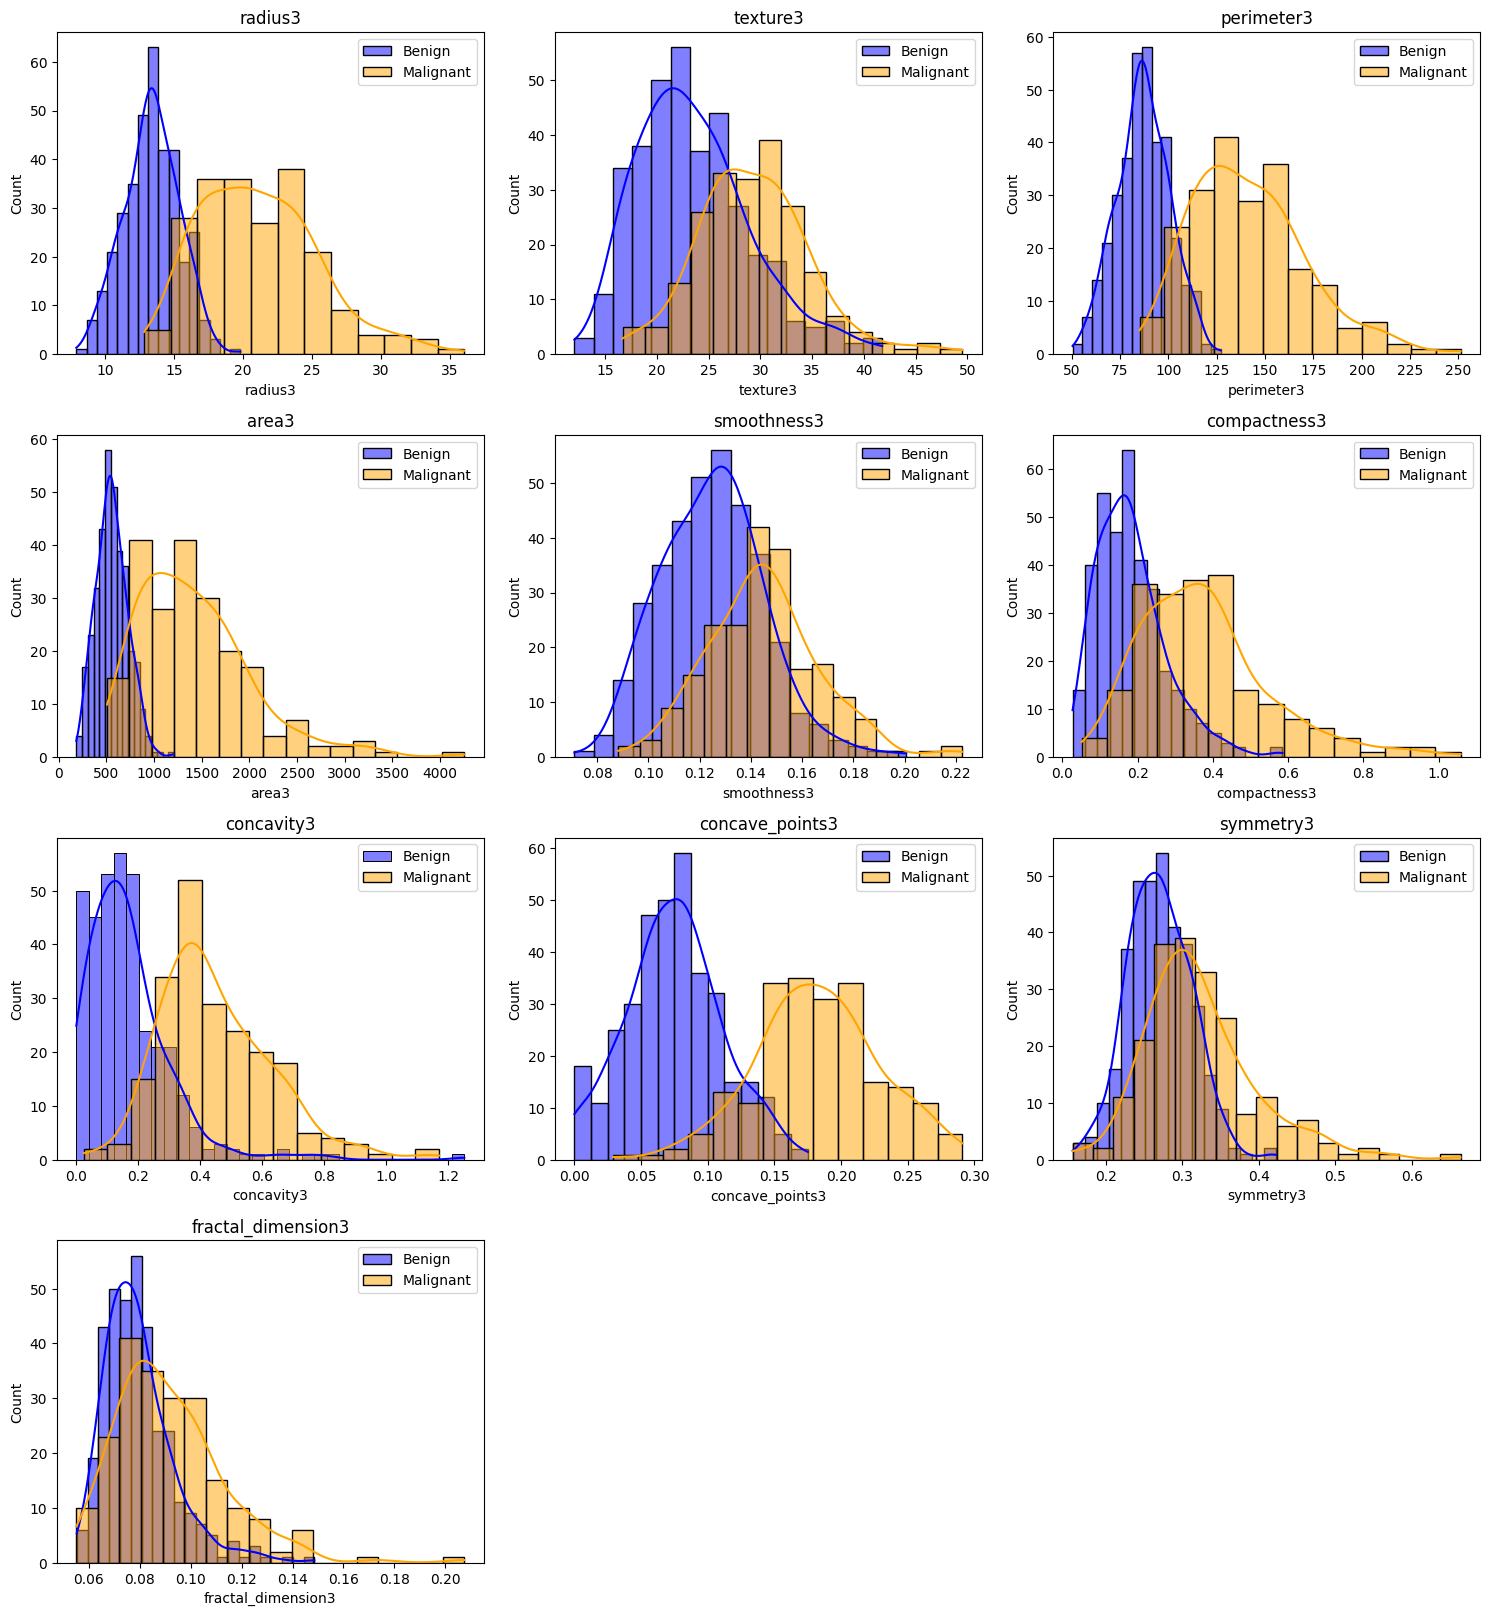

In [70]:
cols = df.columns[:-1]
n_plots = len(cols)

n_rows = math.ceil(n_plots/3)
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
axes = axes.flatten()

for index, col in enumerate(cols[20:]):
    ax = axes[index]
    sns.histplot(data=benign_df[col], color='blue', label='Benign', kde=True, ax=ax)
    sns.histplot(data=malignant_df[col], color='orange', label='Malignant', kde=True, ax=ax)
    ax.set_title(col)
    ax.legend()

for j in range(index+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show

### Analysis
These histogram plots allow us to visualize which features best distinguish between malignant and benign diagnoses. Features with less overlap between the two distributions provide better class separation.

For example, the feature **concave points** shows a clear difference in distribution for both average and worst values, while the distribution for **symmetry** has more overlap. This suggests that **concave points** will provide more information for classification.

The features that appear to best separate classes include **concave points** followed by **concavity**, **radius**, **perimeter** and **area**. Worst values appear to show slightly better separation than mean values.

## Correlation Heatmap Plots for Mean and Worst Values

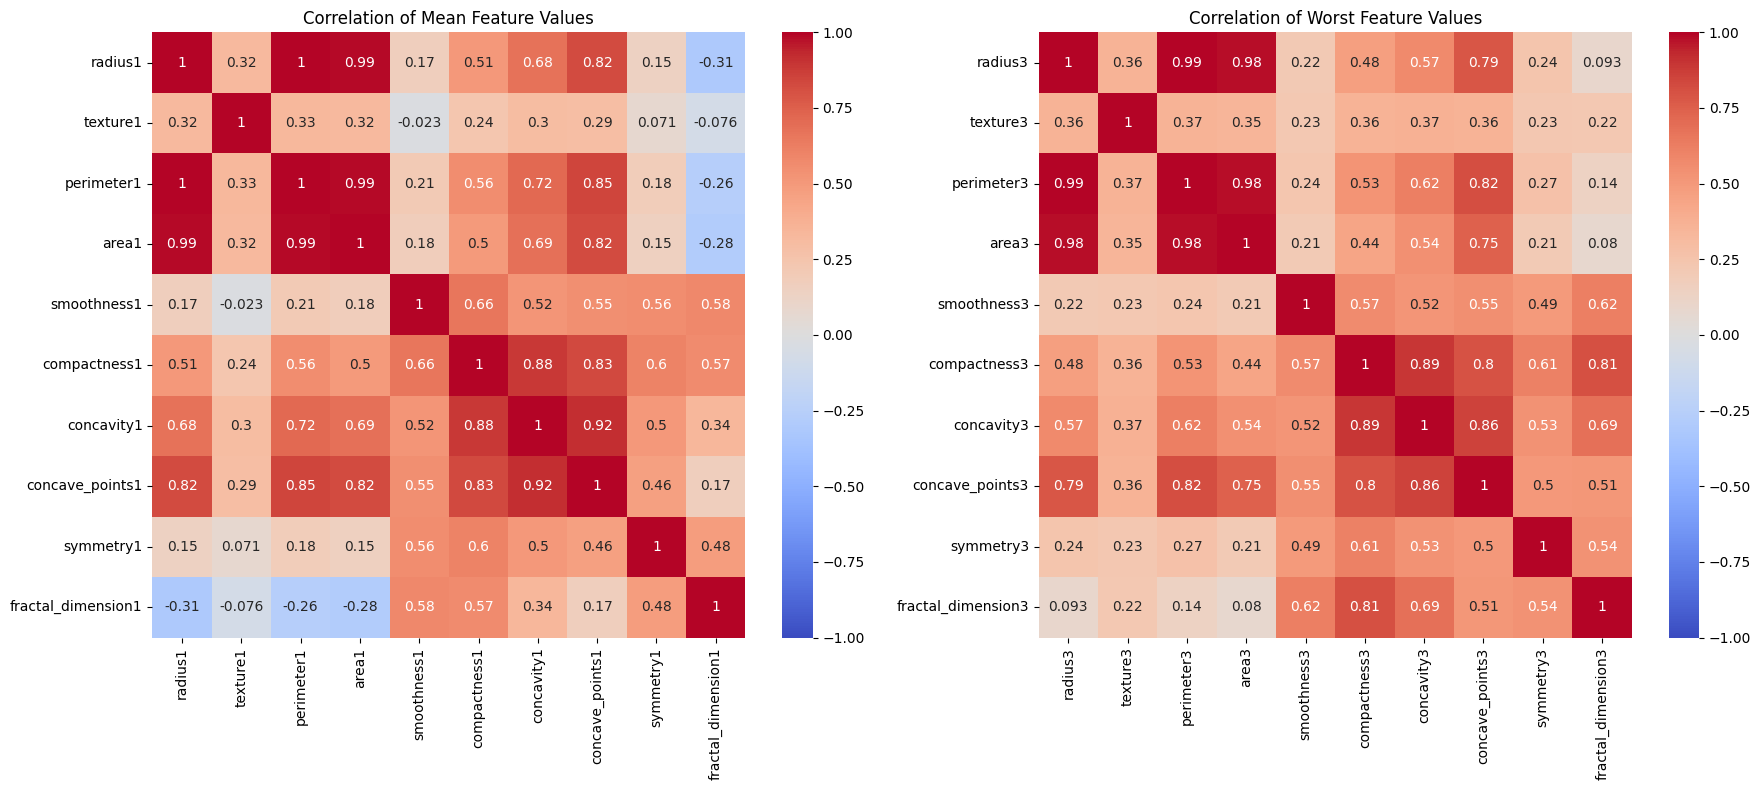

In [95]:
mean_cols = [col for col in df.columns if col.endswith('1')]
worst_cols = [col for col in df.columns if col.endswith('3')]

fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.heatmap(df[mean_cols].corr(), cmap='coolwarm', annot=True, ax=axes[0], vmax=1, vmin=-1)
axes[0].set_title("Correlation of Mean Feature Values")
sns.heatmap(df[worst_cols].corr(), cmap='coolwarm', annot=True, ax=axes[1], vmax=1, vmin=-1)
axes[1].set_title("Correlation of Worst Feature Values")

plt.tight_layout()
plt.show()

### Analysis
Correlation heatmaps provide a visual representation of the relationship between our features, helping us identify redundancies in the data. This allows us to reduce dimensionality by removing or combining highly correlated features without significant loss of information. For instance, we can see that **perimeter**, **area** and **radius** are all highly correlated with one another. This makes sense as they are all representing the size of the nuclei.